In [1]:
import matplotlib 
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import json
import pandas
import pandas as pd
import csv
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv(r'C:\Users\Luke\Desktop\Fall_2018\505\merged_data\auth_aveCites3stds__affils_atleast5pubs.csv', encoding='cp1252', dtype='str', error_bad_lines=False)
df.shape

(9877, 4)

In [5]:
del df['Unnamed: 0']

In [6]:
df.head()

,Author_ID,MeanCites,list_affils
0,6507050078,23.875,['60027090']
1,6603924027,24.375,['60027090' '60013443' '60009226' nan]
2,6603405867,11.0,['60027090' '60001064']
3,35453822900,13.923076923076923,['60015760' '101770494' '60006726' '107003305']
4,7004383851,13.923076923076923,['60015760' '60006726' '60020402' '107003305']


In [18]:
df.MeanCites = df.MeanCites.astype('float64')
df.MeanCites.describe()

# one standard deviation: 41
# mean: 26
# one standard devaition from mean: 67
df_oneStd = df[df['MeanCites'] > 67]

In [26]:
isHighAveCites = df['Author_ID'].astype('int64')
for x in range(0,len(isHighAveCites)):
    isHighAveCites[x] = 0
isHighAveCites.describe()

0     6507050078
1     6603924027
2     6603405867
3    35453822900
4     7004383851
Name: Author_ID, dtype: int64

In [29]:
df['isHighAveCites'] = 'low'

In [30]:
df.head()

,Author_ID,MeanCites,list_affils,isHighAveCites
0,6507050078,23.875000,['60027090'],low
1,6603924027,24.375000,['60027090' '60013443' '60009226' nan],low
2,6603405867,11.000000,['60027090' '60001064'],low
3,35453822900,13.923077,['60015760' '101770494' '60006726' '107003305'],low
4,7004383851,13.923077,['60015760' '60006726' '60020402' '107003305'],low


In [31]:
high = df.MeanCites > 67.0

In [33]:
high.head()

0    False
1    False
2    False
3    False
4    False
Name: MeanCites, dtype: bool

In [34]:
df.loc[high, 'isHighAveCites'] = 'high'

In [39]:
df['IsHighAveCites'] = df.isHighAveCites.map({'low':0, 'high':1})
df.head()

,Author_ID,MeanCites,list_affils,isHighAveCites,IsHighAveCites
0,6507050078,23.875000,['60027090'],low,0
1,6603924027,24.375000,['60027090' '60013443' '60009226' nan],low,0
2,6603405867,11.000000,['60027090' '60001064'],low,0
3,35453822900,13.923077,['60015760' '101770494' '60006726' '107003305'],low,0
4,7004383851,13.923077,['60015760' '60006726' '60020402' '107003305'],low,0


In [71]:
highAuths = df[df['isHighAveCites'] > 0]

In [74]:
# list of authors with "high" number of citations
hAuths = highAuths.Author_ID
hAuths = hAuths.reset_index()
del hAuths['index']
hAuths.head()

In [68]:
df.columns = ['Author_ID', 'MeanCites', 'list_affils', 'Cites_H_L', 'isHighAveCites']

In [78]:
hAuths.to_csv('authors_highAveCites.csv')

In [81]:
df2 = pd.read_csv(r'C:\Users\Luke\Desktop\Fall_2018\505\merged_data\auth_5pubs_cites.csv', encoding='cp1252', dtype='str', error_bad_lines=False)
df2.shape

(88279, 5)

In [95]:
df2.describe()

,Unnamed: 0,eid,Author_ID,Affiliation_ID,cite,Auth_Ave_Cites
count,88279,88279,88279,84924,88279,88279
unique,88279,43109,10045,5152,549,1
top,22553,2-s2.0-84859699831,7202016361,60026124,0,not high
freq,1,109,153,1844,24437,88279


In [83]:
df2['Auth_Ave_Cites'] = 'not high'

In [98]:
for x in range (0,len(df2)):
    for z in range(0,len(hAuths)):
        if (df2.Author_ID[x] == hAuths.Author_ID[z]):
            df2.Auth_Ave_Cites[x] = 'high'
    print('ok $x is done')

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x is done
ok $x 

In [101]:
df2.Auth_Ave_Cites.describe()

count        88279
unique           2
top       not high
freq         79059
Name: Auth_Ave_Cites, dtype: object

In [107]:
df2.loc[df2['Auth_Ave_Cites'] == 'high']

,Unnamed: 0,eid,Author_ID,Affiliation_ID,cite,Auth_Ave_Cites
40,188,2-s2.0-37249046051,55161815100,NaN,0,high
61,235,2-s2.0-37249064221,7201660226,60025038,0,high
103,373,2-s2.0-44349171666,35425749000,60006297,147,high
115,412,2-s2.0-36849069880,18734796400,60029830,5,high
119,416,2-s2.0-36849069880,6603107805,100746219,5,high
128,442,2-s2.0-39749134935,8294001800,60026124,14,high
129,445,2-s2.0-39749134935,7003431232,60026124,14,high
144,493,2-s2.0-41149099117,7003983915,60006183,18,high
147,519,2-s2.0-38049100456,7403078142,60005247,566,high
149,534,2-s2.0-38849131252,7102406086,60020304,185,high


In [108]:
paper_with_high = df2.drop_duplicates(subset='eid')


In [109]:
paper_with_high['IsHigh'] = paper_with_high.Auth_Ave_Cites.map({'not high':0, 'high':1})
paper_with_high.head()

C:\Users\Luke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Unnamed: 0,eid,Author_ID,Affiliation_ID,cite,Auth_Ave_Cites,IsHigh
0,14,2-s2.0-84858487958,6507050078,60027090,0,not high,0
3,29,2-s2.0-84858503835,6507050078,60027090,0,not high,0
6,37,2-s2.0-37349041400,35453822900,60015760,7,not high,0
9,41,2-s2.0-37349014523,8565487400,60021606,3,not high,0
15,51,2-s2.0-84858512072,6507701652,60009254,0,not high,0


In [112]:
paper_with_high[['cite']] = paper_with_high[['cite']].apply(pd.to_numeric)

C:\Users\Luke\Anaconda3\lib\site-packages\pandas\core\frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [116]:
paper_with_high.cite.dtype

dtype('int64')

In [124]:
paper_with_high.to_csv('paper_with_high.csv')

In [117]:
y = paper_with_high.cite
x = paper_with_high.IsHigh

[[114.31218092]]


In [67]:
zip(df.IsHighAveCites, lm.coef_)

In [142]:
no_outs = paper_with_high.loc[paper_with_high['cite'] < 397]

In [147]:
no_outs = no_outs.reset_index()
del no_outs['index']
del no_outs['Unnamed: 0']
no_outs.head()

,eid,Author_ID,Affiliation_ID,cite,Auth_Ave_Cites,IsHigh
0,2-s2.0-84858487958,6507050078,60027090,0,not high,0
1,2-s2.0-84858503835,6507050078,60027090,0,not high,0
2,2-s2.0-37349041400,35453822900,60015760,7,not high,0
3,2-s2.0-37349014523,8565487400,60021606,3,not high,0
4,2-s2.0-84858512072,6507701652,60009254,0,not high,0


In [138]:
high = paper_with_high.loc[paper_with_high['Auth_Ave_Cites'] == 'high']

In [37]:
df3 = pd.read_csv(r'C:\Users\Luke\Desktop\Fall18\505 Data Science\data\authors_highAveCites_1std_binaryCateg.csv', encoding='cp1252', dtype='str', error_bad_lines=False)
df3.shape

(43109, 8)

In [38]:
df3 = df3.reset_index()
del df3['index']

In [39]:
del df3['Unnamed: 0']
del df3['Unnamed: 0.1']
df3.head()

,eid,Author_ID,Affiliation_ID,cite,Auth_Ave_Cites,IsHigh
0,2-s2.0-84858487958,6507050078,60027090,0,not high,0
1,2-s2.0-84858503835,6507050078,60027090,0,not high,0
2,2-s2.0-37349041400,35453822900,60015760,7,not high,0
3,2-s2.0-37349014523,8565487400,60021606,3,not high,0
4,2-s2.0-84858512072,6507701652,60009254,0,not high,0


In [44]:
df3.columns = ['eid', 'Author_ID', 'Affiliation_ID', 'Citations', 'Average Citations Per Author', 'IsHigh']

In [46]:
df3.Citations = df3.Citations.astype('int64')
df3 = df3.loc[df3['Citations'] < 70]
df3.describe()

,Citations
count,40652.000000
mean,8.697604
std,13.692959
min,0.000000
25%,0.000000
50%,2.000000
75%,11.000000
max,69.000000


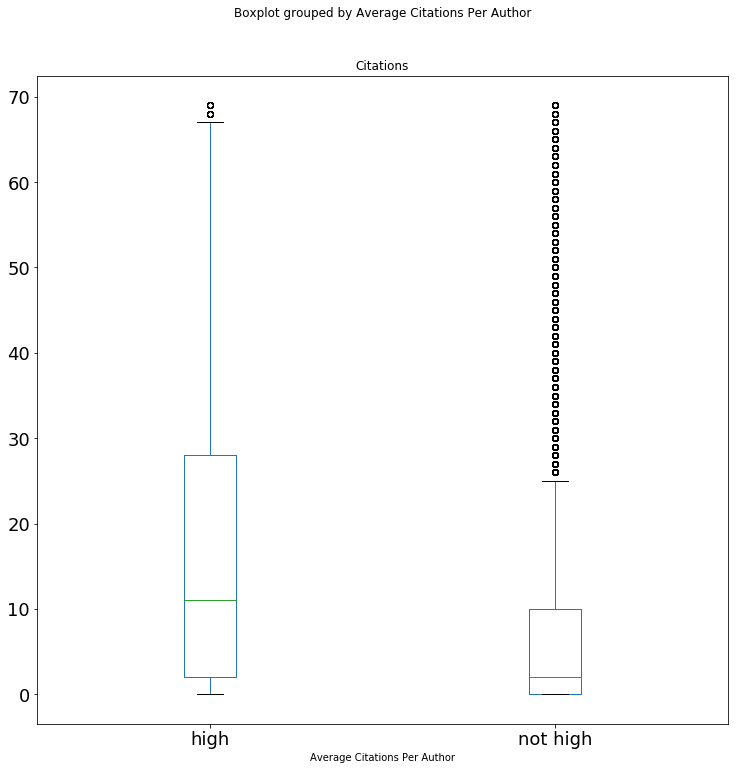

In [49]:
df3.boxplot(by='Average Citations Per Author', column=['Citations'], fontsize=18, figsize=(12,12), grid=False)